##      **Natural Diamonds Shape Prediction**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Natural Diamond Shape" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d harshitlakhani/natural-diamonds-prices-images
!unzip natural-diamonds-prices-images.zip -d natural-diamonds-prices-images-dataset

Streaming output truncated to the last 5000 lines.
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795562.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795563.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795564.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795565.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795566.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795567.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795568.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795571.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795572.png  
  inflating: natural-diamonds-prices-images-dataset/Diamonds2/images/cushion/1795573.png  
  inflating: natural-diamonds-prices-im

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Directories for train and validation datasets
train_dir1 = '/content/natural-diamonds-prices-images-dataset/Diamonds/images'
train_dir2 = '/content/natural-diamonds-prices-images-dataset/Diamonds2/images'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process each directory (train or valid)
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)

# Process the train directories
process_directory(train_dir1, labels, image_paths)
process_directory(train_dir2, labels, image_paths)

# Split the data into train and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.10, random_state=42)

# Create DataFrame for train data and save to CSV
train_data = {'Image_Path': train_paths, 'Label': train_labels}
train_df = pd.DataFrame(train_data)

train_csv_file_path = '/content/natural-diamonds-prices-images-dataset/train_data.csv'
train_df.to_csv(train_csv_file_path, index=False)

# Create DataFrame for test data with true labels and predicted labels
test_data = {'Image_Path': test_paths, 'True_Label': test_labels, 'Predicted_Label': ['unknown'] * len(test_labels)}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/natural-diamonds-prices-images-dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV files for train and test data saved successfully!")

CSV files for train and test data saved successfully!


In [5]:
df = pd.read_csv('/content/natural-diamonds-prices-images-dataset/train_data.csv')
df2 = pd.read_csv('/content/natural-diamonds-prices-images-dataset/test_data.csv')
num_classes1 = len(df['Label'].unique())
num_classes2 = len(df2['True_Label'].unique())
num_classes3 = len(df2['Predicted_Label'].unique())
print(num_classes1)
print(num_classes2)
print(num_classes3)

9
9
1


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , VGG16 and ResNet50 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , ResNet50 , MobileNetV2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [7]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/natural-diamonds-prices-images-dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.9, test_size=0.1, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

9


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [9]:

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 6852 validated image filenames belonging to 9 classes.
Found 762 validated image filenames belonging to 9 classes.


# Exploratory Data Analysis

In [10]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                             Image_Path     Label
7014  /content/natural-diamonds-prices-images-datase...     round
1782  /content/natural-diamonds-prices-images-datase...     round
3689  /content/natural-diamonds-prices-images-datase...  marquise
4874  /content/natural-diamonds-prices-images-datase...   cushion
7138  /content/natural-diamonds-prices-images-datase...   cushion
(6852, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 6852 entries, 7014 to 7270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  6852 non-null   object
 1   Label       6852 non-null   object
dtypes: object(2)
memory usage: 160.6+ KB
None
                                               Image_Path  Label
count                                                6852   6852
unique                                               6852      9
top     /content/natural-diamonds-prices-images-datase...  round
freq                   

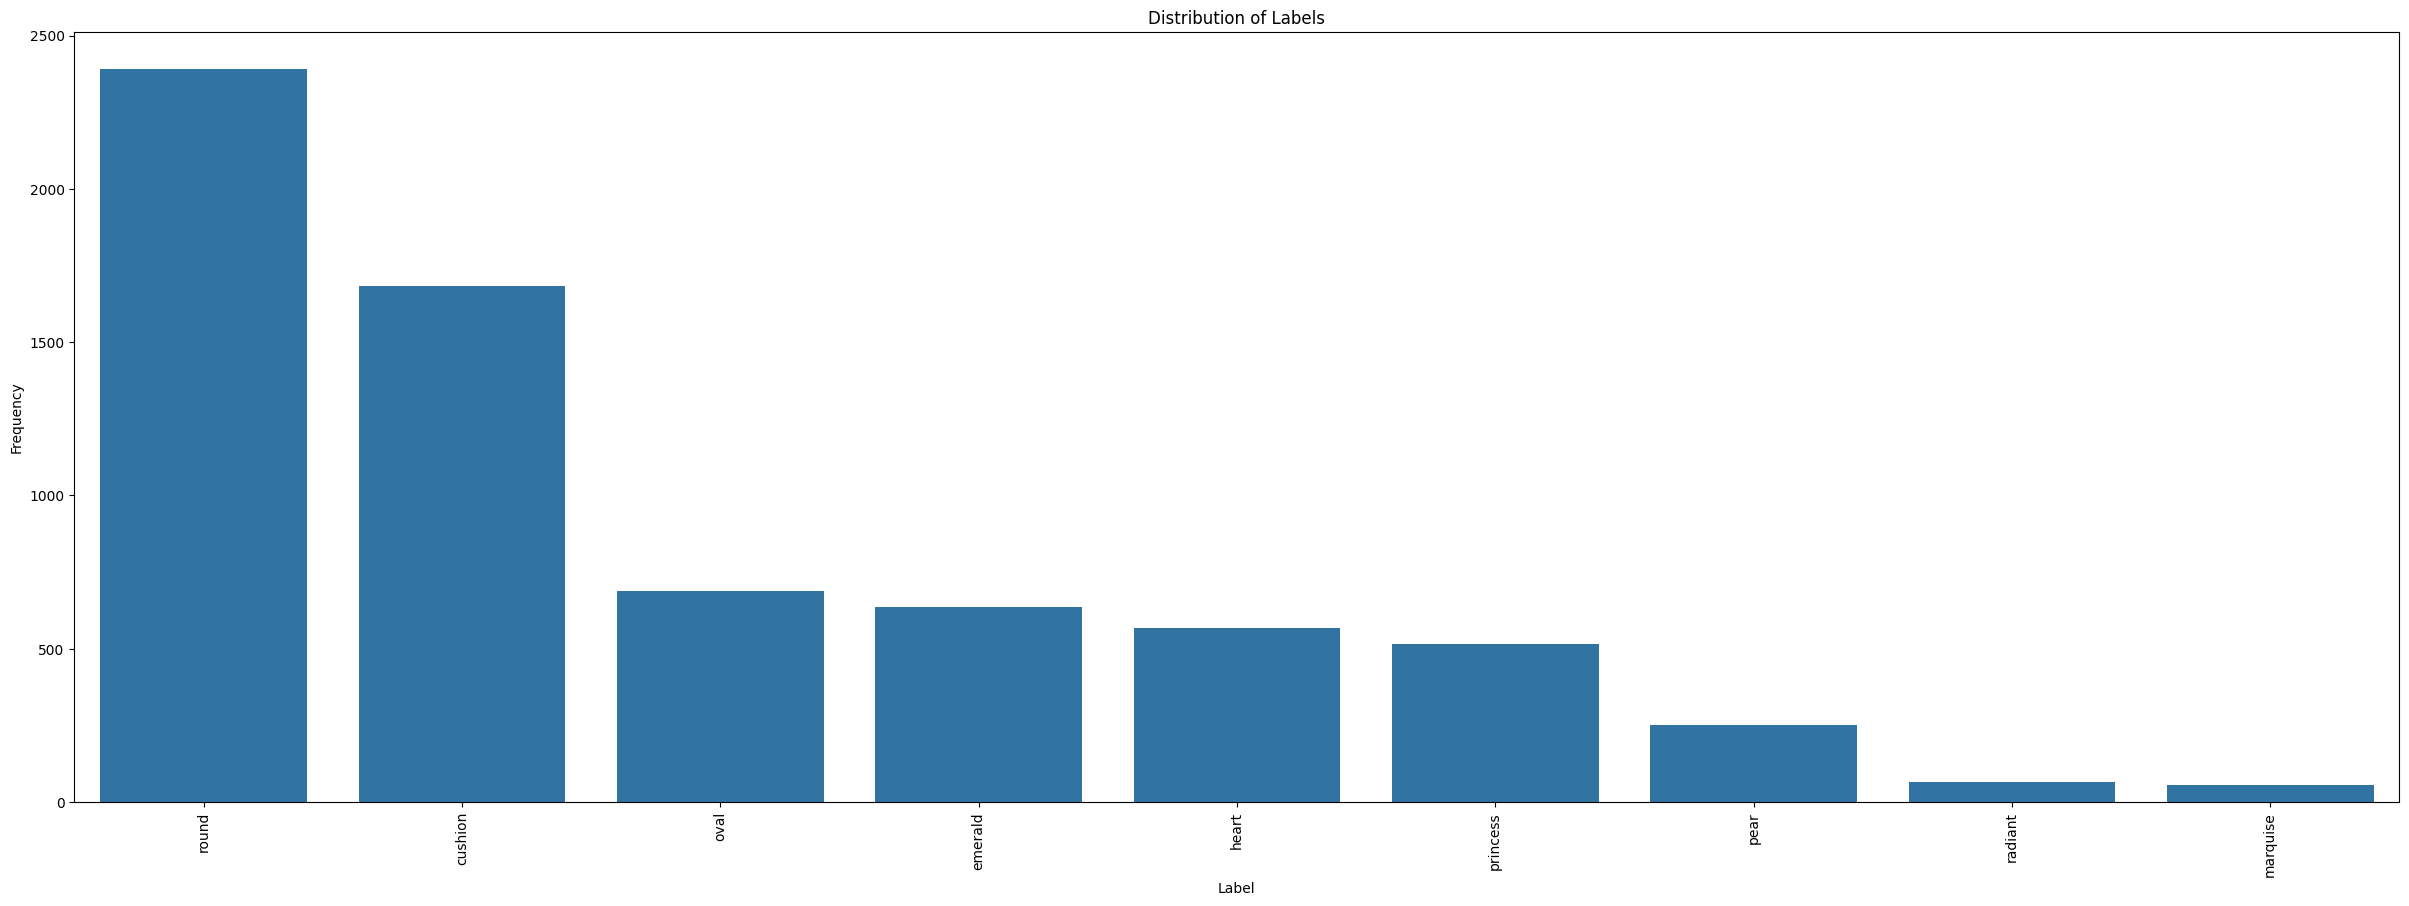

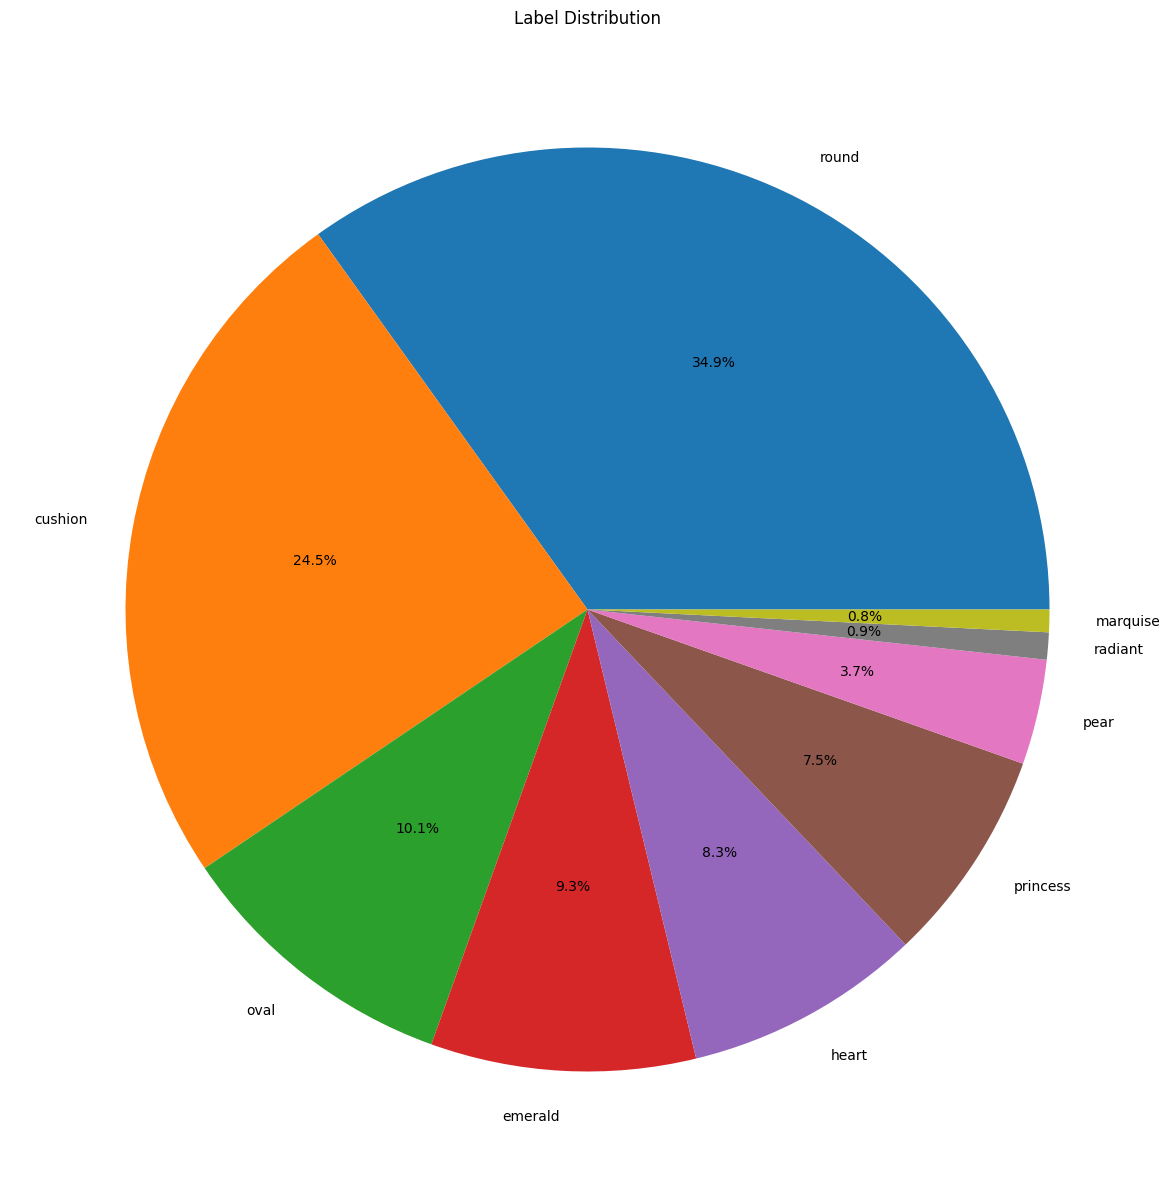

In [ ]:
# Bar chart for label distribution
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df, x='Label', order=train_df['Label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(15, 15))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Number of unique image paths: 6852


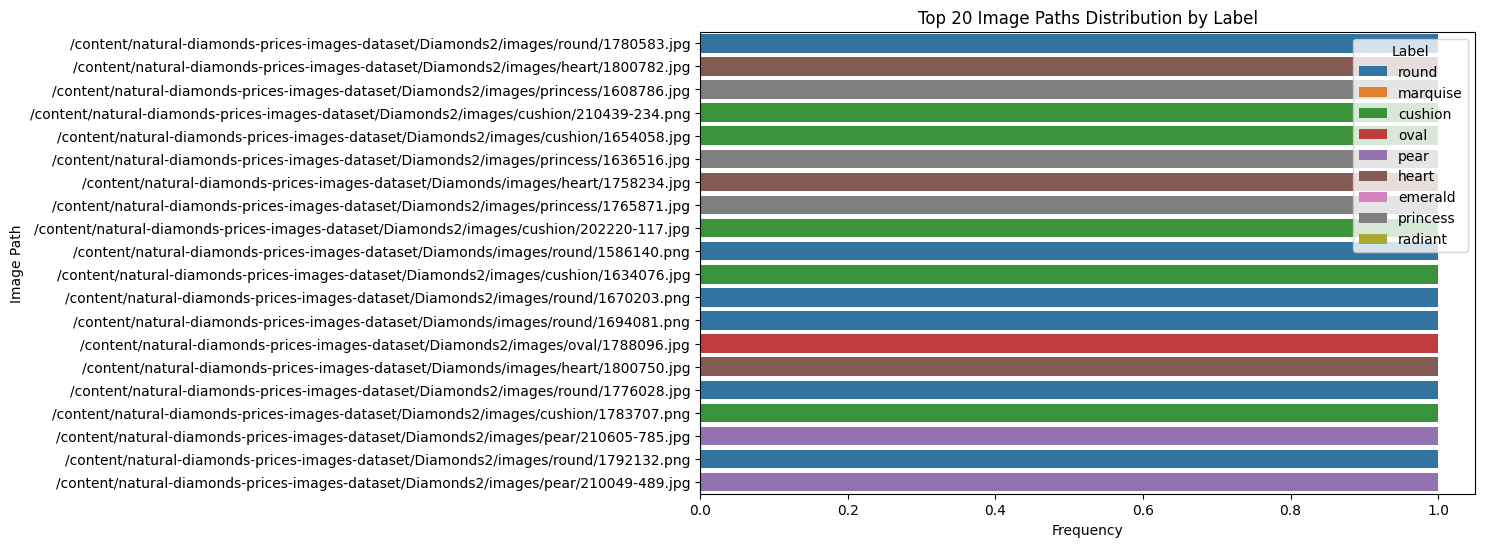

Column Image_Path has 6852 unique values.
Column Label has 9 unique values.


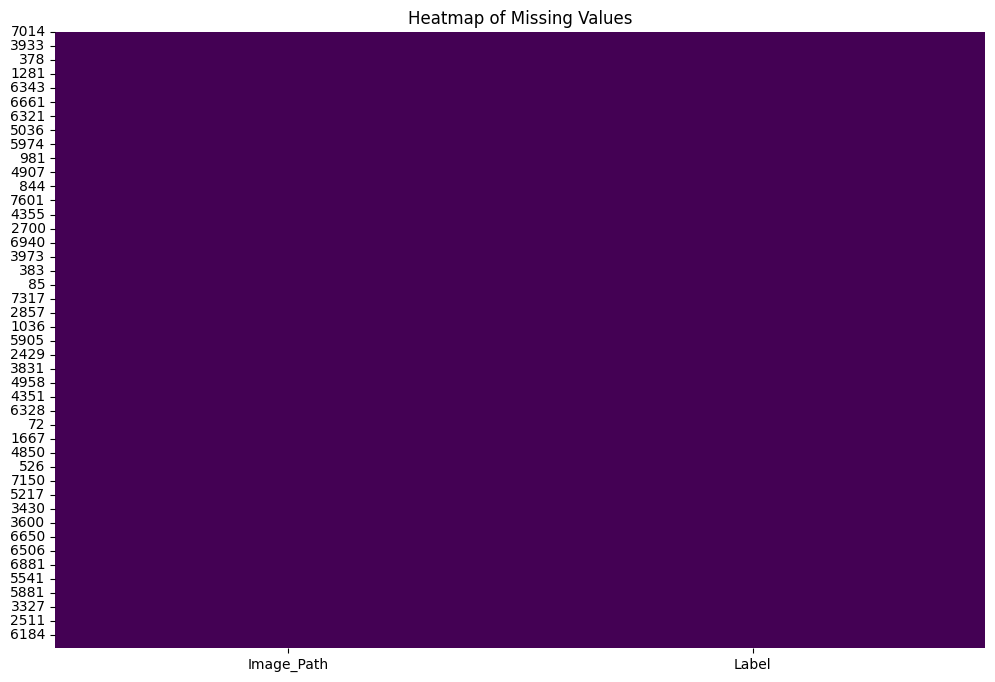

Label
round       2392
cushion     1682
oval         689
emerald      635
heart        569
princess     514
pear         252
radiant       65
marquise      54
Name: count, dtype: int64


In [ ]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [ ]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [11]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [12]:
from keras.callbacks import EarlyStopping
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the specified number of epochs
    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

In [13]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Adjustments for ResNet50
  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      if model_name == 'ResNet50':
          # Unfreeze more layers for ResNet50 and adjust learning rate
          for layer in model.layers[-30:]:
              layer.trainable = True
          epochs = 15
          optimizer = optimizers.Adam(learning_rate=0.0001)
      else:
          epochs = 13
          optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

94765736/94765736 [==============================] - 0s 0us/step
Training ResNet50...
Epoch 1/15
215/215 [==============================] - 172s 596ms/step - loss: 0.6527 - accuracy: 0.7698 - val_loss: 1.8910 - val_accuracy: 0.3346
Epoch 2/15
215/215 [==============================] - 125s 583ms/step - loss: 0.4184 - accuracy: 0.8406 - val_loss: 1.8289 - val_accuracy: 0.3346
Epoch 3/15
215/215 [==============================] - 126s 584ms/step - loss: 0.3896 - accuracy: 0.8441 - val_loss: 0.9958 - val_accuracy: 0.6654
Epoch 4/15
215/215 [==============================] - 129s 598ms/step - loss: 0.3756 - accuracy: 0.8552 - val_loss: 0.5099 - val_accuracy: 0.8123
Epoch 5/15
215/215 [==============================] - 126s 585ms/step - loss: 0.3678 - accuracy: 0.8523 - val_loss: 0.3864 - val_accuracy: 0.8386
Epoch 6/15
215/215 [==============================] - 131s 607ms/step - loss: 0.3610 - accuracy: 0.8600 - val_loss: 0.3459 - val_accuracy: 0.8504
Epoch 7/15
215/215 [==================

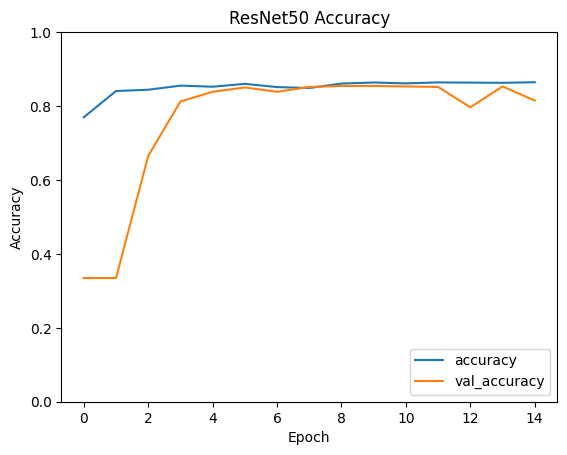

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved ResNet50 model to saved_models/ResNet50_saved.h5


In [14]:
# List of base models with their respective input shapes
base_models1 = [
    (ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3),'ResNet50'),
]
model_training (base_models1)

87910968/87910968 [==============================] - 0s 0us/step
Training InceptionV3...
Epoch 1/13
215/215 [==============================] - 166s 574ms/step - loss: 0.6877 - accuracy: 0.7646 - val_loss: 0.3862 - val_accuracy: 0.8438
Epoch 2/13
215/215 [==============================] - 115s 533ms/step - loss: 0.4067 - accuracy: 0.8459 - val_loss: 0.3437 - val_accuracy: 0.8530
Epoch 3/13
215/215 [==============================] - 114s 529ms/step - loss: 0.4056 - accuracy: 0.8459 - val_loss: 0.4081 - val_accuracy: 0.8373
Epoch 4/13
215/215 [==============================] - 115s 533ms/step - loss: 0.3738 - accuracy: 0.8543 - val_loss: 0.3663 - val_accuracy: 0.8530
Epoch 5/13
215/215 [==============================] - 116s 541ms/step - loss: 0.3636 - accuracy: 0.8590 - val_loss: 0.3427 - val_accuracy: 0.8517
Epoch 6/13
215/215 [==============================] - 116s 538ms/step - loss: 0.3691 - accuracy: 0.8555 - val_loss: 0.3485 - val_accuracy: 0.8517
Epoch 7/13
215/215 [===============

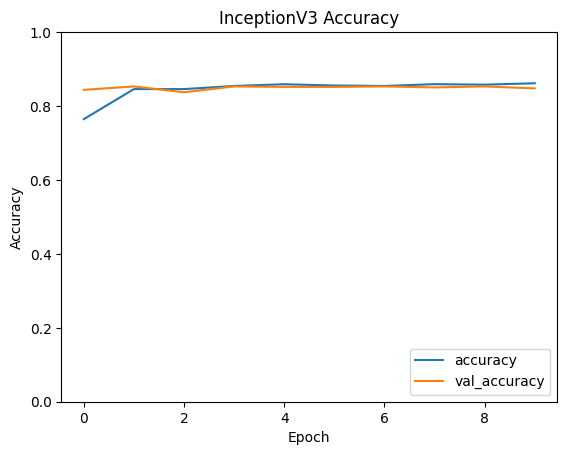

Saved InceptionV3 model to saved_models/InceptionV3_saved.h5


In [15]:
base_models2 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3')
]
model_training (base_models2)

83683744/83683744 [==============================] - 0s 0us/step
Training Xception...
Epoch 1/13
215/215 [==============================] - 179s 677ms/step - loss: 0.7227 - accuracy: 0.7551 - val_loss: 0.3870 - val_accuracy: 0.8438
Epoch 2/13
215/215 [==============================] - 142s 657ms/step - loss: 0.3931 - accuracy: 0.8507 - val_loss: 0.3623 - val_accuracy: 0.8504
Epoch 3/13
215/215 [==============================] - 141s 656ms/step - loss: 0.3702 - accuracy: 0.8560 - val_loss: 0.3491 - val_accuracy: 0.8504
Epoch 4/13
215/215 [==============================] - 142s 658ms/step - loss: 0.3579 - accuracy: 0.8571 - val_loss: 0.3450 - val_accuracy: 0.8543
Epoch 5/13
215/215 [==============================] - 143s 664ms/step - loss: 0.3494 - accuracy: 0.8596 - val_loss: 0.3412 - val_accuracy: 0.8543
Epoch 6/13
215/215 [==============================] - 141s 654ms/step - loss: 0.3521 - accuracy: 0.8574 - val_loss: 0.3411 - val_accuracy: 0.8543
Epoch 7/13
215/215 [==================

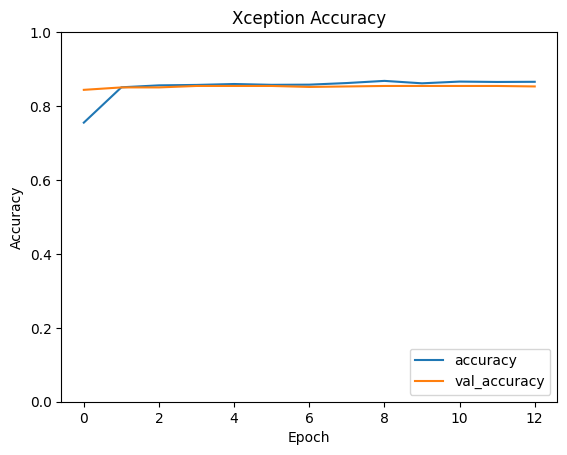

Saved Xception model to saved_models/Xception_saved.h5


In [16]:
base_models3 = [
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception')
]
model_training (base_models3)

9406464/9406464 [==============================] - 0s 0us/step
Training MobileNetV2...
Epoch 1/13
215/215 [==============================] - 134s 494ms/step - loss: 0.8102 - accuracy: 0.7176 - val_loss: 0.9122 - val_accuracy: 0.7087
Epoch 2/13
215/215 [==============================] - 100s 465ms/step - loss: 0.4255 - accuracy: 0.8395 - val_loss: 0.5993 - val_accuracy: 0.7690
Epoch 3/13
215/215 [==============================] - 105s 489ms/step - loss: 0.4005 - accuracy: 0.8440 - val_loss: 0.4741 - val_accuracy: 0.8110
Epoch 4/13
215/215 [==============================] - 102s 472ms/step - loss: 0.3748 - accuracy: 0.8519 - val_loss: 0.3567 - val_accuracy: 0.8504
Epoch 5/13
215/215 [==============================] - 101s 472ms/step - loss: 0.3707 - accuracy: 0.8554 - val_loss: 0.3465 - val_accuracy: 0.8150
Epoch 6/13
215/215 [==============================] - 102s 473ms/step - loss: 0.3509 - accuracy: 0.8609 - val_loss: 0.3425 - val_accuracy: 0.8517
Epoch 7/13
215/215 [=================

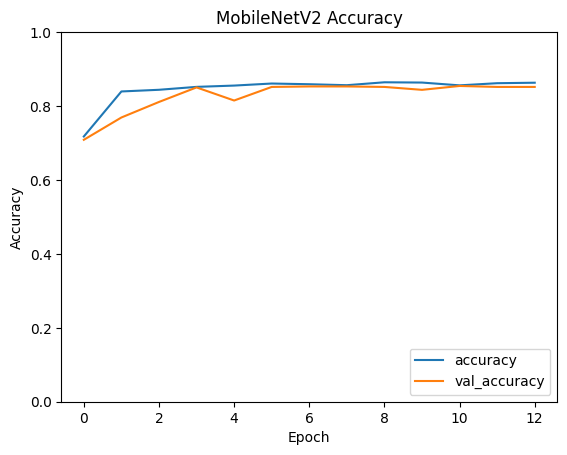

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [17]:
base_models4 = [
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models4)

29084464/29084464 [==============================] - 0s 0us/step
Training DenseNet121...
Epoch 1/13
215/215 [==============================] - 214s 653ms/step - loss: 0.8037 - accuracy: 0.7208 - val_loss: 0.3922 - val_accuracy: 0.8425
Epoch 2/13
215/215 [==============================] - 130s 604ms/step - loss: 0.4295 - accuracy: 0.8365 - val_loss: 0.3613 - val_accuracy: 0.8491
Epoch 3/13
215/215 [==============================] - 128s 596ms/step - loss: 0.3836 - accuracy: 0.8520 - val_loss: 0.3416 - val_accuracy: 0.8530
Epoch 4/13
215/215 [==============================] - 128s 597ms/step - loss: 0.3847 - accuracy: 0.8495 - val_loss: 0.3395 - val_accuracy: 0.8530
Epoch 5/13
215/215 [==============================] - 128s 596ms/step - loss: 0.3568 - accuracy: 0.8595 - val_loss: 0.3413 - val_accuracy: 0.8530
Epoch 6/13
215/215 [==============================] - 126s 587ms/step - loss: 0.3657 - accuracy: 0.8535 - val_loss: 0.3391 - val_accuracy: 0.8543
Epoch 7/13
215/215 [===============

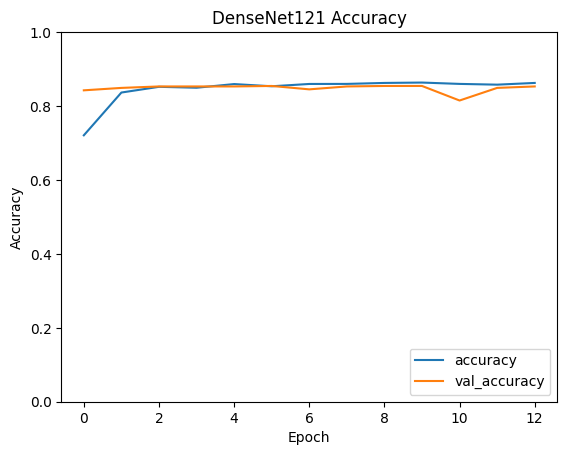

Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [18]:
# List of base models with their respective input shapes
base_models5 = [
   (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models5)

# Testing and labeling unseen data

In [19]:
import os
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
from tqdm.notebook import tqdm

# Load test dataset
test_df = pd.read_csv('/content/natural-diamonds-prices-images-dataset/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in tqdm(range(num_batches), desc="Processing batches"):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images, verbose=0)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'True_Label': test_df['True_Label'],
            'Predicted_Label': prediction_labels,
        })

        # Calculate accuracy
        accuracy = np.mean(predicted_df['True_Label'] == predicted_df['Predicted_Label'])

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")
        print(f"Test Accuracy: {accuracy:.2%}")

Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Predictions saved to /content/saved_models/predicted_MobileNetV2_saved.csv
Test Accuracy: 87.01%


Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Predictions saved to /content/saved_models/predicted_ResNet50_saved.csv
Test Accuracy: 87.01%


Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv
Test Accuracy: 87.13%


Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Predictions saved to /content/saved_models/predicted_Xception_saved.csv
Test Accuracy: 87.01%


Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Predictions saved to /content/saved_models/predicted_InceptionV3_saved.csv
Test Accuracy: 86.78%


# image label and prediction and visualization

Predictions using: predicted_Xception_saved


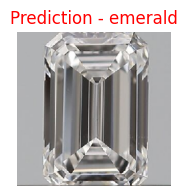

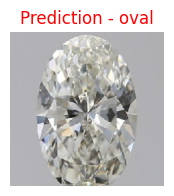

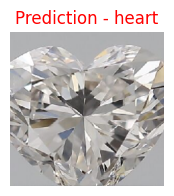

Predictions using: predicted_DenseNet121_saved


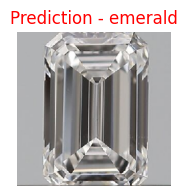

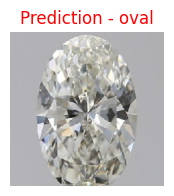

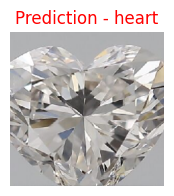

Predictions using: predicted_InceptionV3_saved


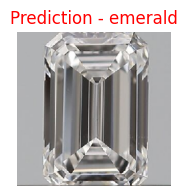

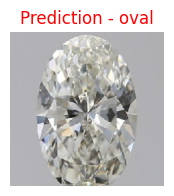

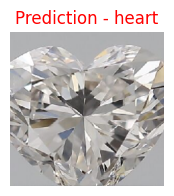

Predictions using: predicted_ResNet50_saved


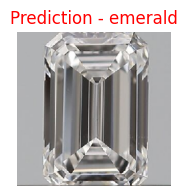

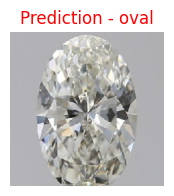

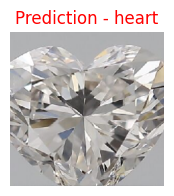

Predictions using: predicted_MobileNetV2_saved


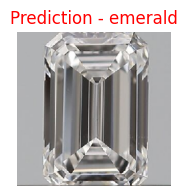

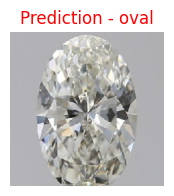

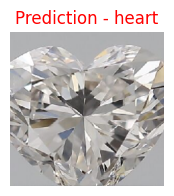

In [4]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example filenames to predict
filenames = [
    '/content/natural-diamonds-prices-images-dataset/Diamonds2/images/emerald/1785096.jpg',
    '/content/natural-diamonds-prices-images-dataset/Diamonds2/images/oval/1785401.jpg',
    '/content/natural-diamonds-prices-images-dataset/Diamonds2/images/heart/1800786.jpg'
]


def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Predicted_Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Directory containing the predicted CSV files
csv_dir = '/content/saved_models'

# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):
        # Determine the model name
        model_name = csv_file.split('.')[0]

        # Path to the CSV file containing predictions for the current model
        predicted_csv_file = os.path.join(csv_dir, csv_file)

        # Load predicted labels from the CSV file
        predicted_labels = load_predicted_labels(predicted_csv_file)

        # Predict and plot images using predicted labels
        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)